In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE,SequentialFeatureSelector
from tqdm import tqdm
from imblearn.pipeline import Pipeline

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from sklearn.naive_bayes import GaussianNB
rs = 0

In [2]:
processed_train_data = pd.read_csv("Processed_train_data.csv")
processed_test_data = pd.read_csv("Processed_test_data.csv")

In [3]:
processed_train_data.head()

,duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service,flag,src_bytes,dst_bytes,land,wrong_fragment,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,class
0,0.0,0.0,1.0,0.0,0.273363,0.145284,0.009003,0.000000,0.0,0.0,...,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0
1,0.0,0.0,0.0,1.0,0.389904,0.145284,0.002677,0.000000,0.0,0.0,...,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0
2,0.0,0.0,1.0,0.0,0.953923,0.989729,0.000000,0.000000,0.0,0.0,...,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1
3,0.0,0.0,1.0,0.0,0.056722,0.145284,0.004254,0.329867,0.0,0.0,...,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.01,0
4,0.0,0.0,1.0,0.0,0.056722,0.145284,0.003649,0.016993,0.0,0.0,...,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0


In [4]:
processed_train_data_trX = processed_train_data.drop(columns=["class"],axis=1)
processed_train_data_trY = processed_train_data["class"]

In [5]:
processed_test_data_trX = processed_test_data.drop(columns=["class"],axis=1)
processed_test_data_trY = processed_test_data["class"]

In [6]:
from imblearn.over_sampling import ADASYN, SMOTE
adasyn = ADASYN(random_state=rs)
smote = SMOTE(random_state=rs)

processed_smote_train_data_trX, processed_smote_train_data_trY = smote.fit_resample(processed_train_data_trX, processed_train_data_trY)

In [7]:
processed_adasyn_train_data_trX, processed_adasyn_train_data_trY = adasyn.fit_resample(processed_train_data_trX, processed_train_data_trY)

In [8]:
processed_smote_train_data = processed_smote_train_data_trX
processed_smote_train_data["class"] = processed_smote_train_data_trY

In [9]:
processed_smote_train_data["class"].value_counts()

0    64928
1    64928
Name: class, dtype: int64

In [10]:
processed_smote_train_data.to_csv("processed_smote_train_data.csv",index=False)

In [11]:
processed_adasyn_train_data = processed_adasyn_train_data_trX
processed_adasyn_train_data["class"] = processed_adasyn_train_data_trY

In [12]:
processed_adasyn_train_data["class"].value_counts()

0    64928
1    64813
Name: class, dtype: int64

In [13]:
processed_train_data["class"].value_counts()

0    64928
1    57709
Name: class, dtype: int64

In [14]:
processed_adasyn_train_data.to_csv("processed_adasyn_train_data.csv",index=False)

In [15]:
processed_smote_train_data_trX = processed_smote_train_data.drop(columns=["class"],axis=1)
processed_smote_train_data_trY = processed_smote_train_data["class"]

processed_adasyn_train_data_trX = processed_adasyn_train_data.drop(columns=["class"],axis=1)
processed_adasyn_train_data_trY = processed_adasyn_train_data["class"]

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix,f1_score,precision_score,recall_score,RocCurveDisplay,PrecisionRecallDisplay

In [17]:
#Function to obtain different metrics based on predicted class labels
def print_metrics(y_test,y_pred,name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix Obtained")
    plt.show();
    accuracy_value = round(accuracy_score(y_test,y_pred),4)
    f1_value = round(f1_score(y_test,y_pred,labels=np.unique(y_pred)),4) 
    prec = round(precision_score(y_test,y_pred,labels=np.unique(y_pred)),4)
    rec = round(recall_score(y_test,y_pred,labels=np.unique(y_pred)),4)
    print("Accuarcy value obtained is ",accuracy_value)
    print("F1-score obtained is ",f1_value)
    print("Precision obtained is ",prec)
    print("Recall obtained is ",rec)
    roc_display = RocCurveDisplay.from_predictions(y_test,y_pred,name=name)
    _ = roc_display.ax_.set_title("ROC curve")
    pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name=name)
    _ = pr_display.ax_.set_title("Precision-Recall curve")
    return [accuracy_value,f1_value,prec,rec]

In [18]:
gnb_results_table = []

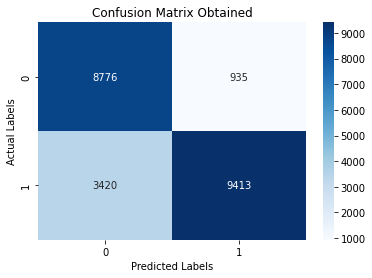

Accuarcy value obtained is  0.8068
F1-score obtained is  0.8121
Precision obtained is  0.9096
Recall obtained is  0.7335


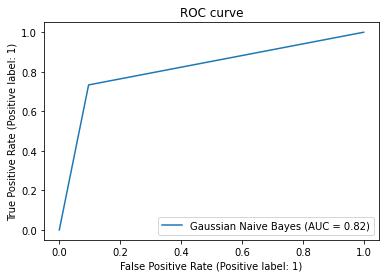

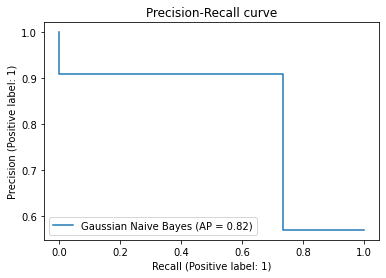

In [20]:
gnb = GaussianNB()
gnb.fit(processed_train_data_trX,processed_train_data_trY)
gnb_yPred = gnb.predict(processed_test_data_trX)
#Performance Metrics obtained using Naive Bayes
gnb_list = ["Gaussian Naive Bayes"]
gnb_list.extend(print_metrics(processed_test_data_trY, gnb_yPred,"Gaussian Naive Bayes"))
gnb_results_table.append(gnb_list)

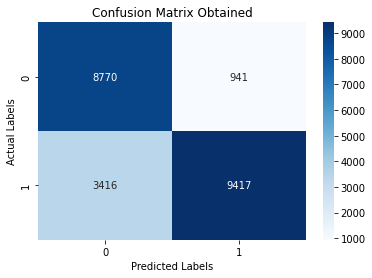

Accuarcy value obtained is  0.8067
F1-score obtained is  0.8121
Precision obtained is  0.9092
Recall obtained is  0.7338


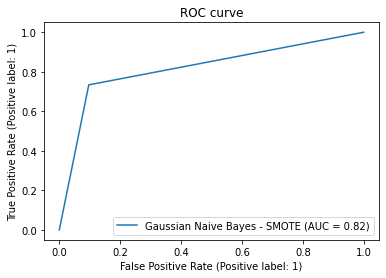

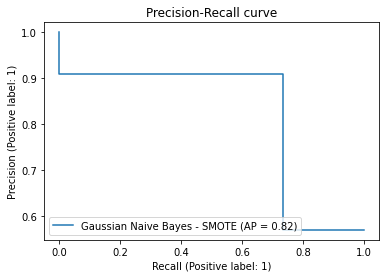

In [22]:
gnb_smote = GaussianNB()
gnb_smote.fit(processed_smote_train_data_trX,processed_smote_train_data_trY)
gnb_smote_yPred = gnb_smote.predict(processed_test_data_trX)
#Performance Metrics obtained using Naive Bayes
gnb_list = ["Gaussian Naive Bayes - SMOTE"]
gnb_list.extend(print_metrics(processed_test_data_trY, gnb_smote_yPred,"Gaussian Naive Bayes - SMOTE"))
gnb_results_table.append(gnb_list)

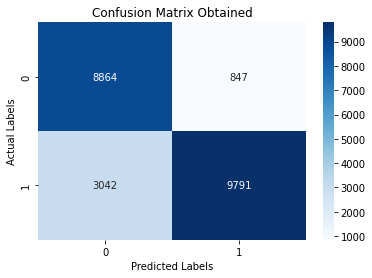

Accuarcy value obtained is  0.8275
F1-score obtained is  0.8343
Precision obtained is  0.9204
Recall obtained is  0.763


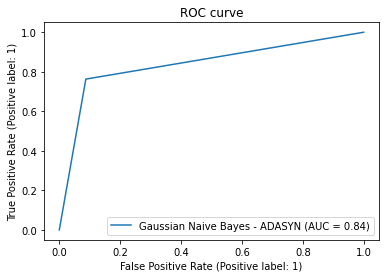

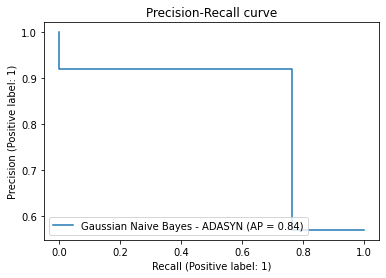

In [23]:
gnb_adasyn = GaussianNB()
gnb_adasyn.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)
gnb_adasyn_yPred = gnb_adasyn.predict(processed_test_data_trX)
#Performance Metrics obtained using Naive Bayes
gnb_list = ["Gaussian Naive Bayes - ADASYN"]
gnb_list.extend(print_metrics(processed_test_data_trY, gnb_adasyn_yPred,"Gaussian Naive Bayes - ADASYN"))
gnb_results_table.append(gnb_list)

In [24]:
gnb_results_table

[['Gaussian Naive Bayes', 0.8068, 0.8121, 0.9096, 0.7335],
 ['Gaussian Naive Bayes - SMOTE', 0.8067, 0.8121, 0.9092, 0.7338],
 ['Gaussian Naive Bayes - ADASYN', 0.8275, 0.8343, 0.9204, 0.763]]

In [25]:
#Hyperparameter Tuning of Naive Bayes Classifier
from sklearn.model_selection import GridSearchCV
gnb = GaussianNB()
params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
grid_search = GridSearchCV(estimator=gnb, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=3, scoring = "f1")
grid_search.fit(processed_train_data_trX,processed_train_data_trY)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1', verbose=3)

In [26]:
grid_search.best_estimator_

GaussianNB(var_smoothing=0.02310129700083159)

In [27]:
#Hyperparameter Tuning of Naive Bayes Classifier
from sklearn.model_selection import GridSearchCV
gnb = GaussianNB()
params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
grid_search = GridSearchCV(estimator=gnb, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=3, scoring = "f1")
grid_search.fit(processed_smote_train_data_trX,processed_smote_train_data_trY)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1', verbose=3)

In [28]:
grid_search.best_estimator_

GaussianNB(var_smoothing=0.02310129700083159)

In [29]:
#Hyperparameter Tuning of Naive Bayes Classifier
from sklearn.model_selection import GridSearchCV
gnb = GaussianNB()
params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
grid_search = GridSearchCV(estimator=gnb, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=3, scoring = "f1")
grid_search.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1', verbose=3)

In [30]:
grid_search.best_estimator_

GaussianNB()

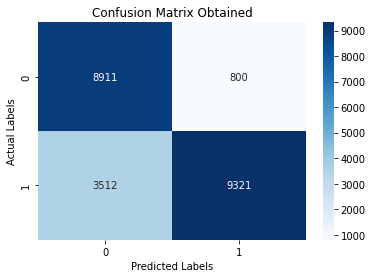

Accuarcy value obtained is  0.8087
F1-score obtained is  0.8121
Precision obtained is  0.921
Recall obtained is  0.7263


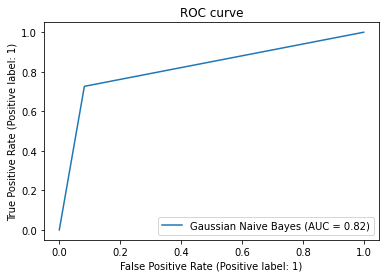

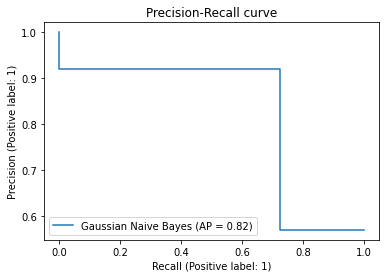

In [31]:
gnb = GaussianNB(var_smoothing=0.02310129700083159)
gnb.fit(processed_train_data_trX,processed_train_data_trY)
gnb_yPred = gnb.predict(processed_test_data_trX)
#Performance Metrics obtained using Naive Bayes
gnb_list = ["Gaussian Naive Bayes after Hyperparameter Tuning"]
gnb_list.extend(print_metrics(processed_test_data_trY, gnb_yPred,"Gaussian Naive Bayes"))
gnb_results_table.append(gnb_list)

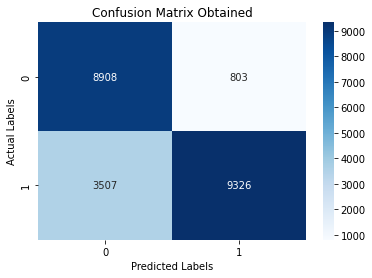

Accuarcy value obtained is  0.8088
F1-score obtained is  0.8123
Precision obtained is  0.9207
Recall obtained is  0.7267


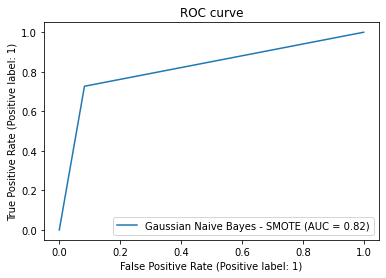

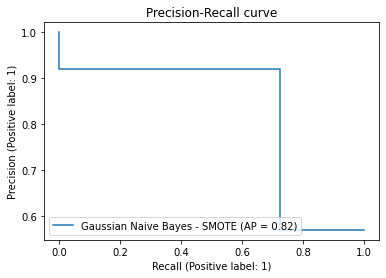

In [32]:
gnb_smote = GaussianNB(var_smoothing=0.02310129700083159)
gnb_smote.fit(processed_smote_train_data_trX,processed_smote_train_data_trY)
gnb_smote_yPred = gnb_smote.predict(processed_test_data_trX)
#Performance Metrics obtained using Naive Bayes
gnb_list = ["Gaussian Naive Bayes - SMOTE after Hyperparameter Tuning"]
gnb_list.extend(print_metrics(processed_test_data_trY, gnb_smote_yPred,"Gaussian Naive Bayes - SMOTE"))
gnb_results_table.append(gnb_list)

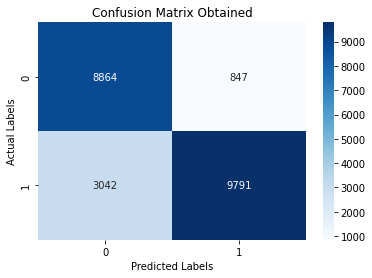

Accuarcy value obtained is  0.8275
F1-score obtained is  0.8343
Precision obtained is  0.9204
Recall obtained is  0.763


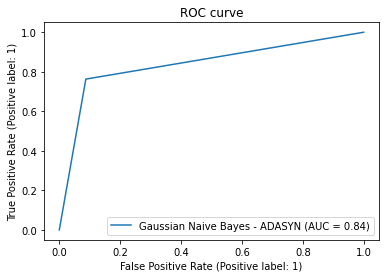

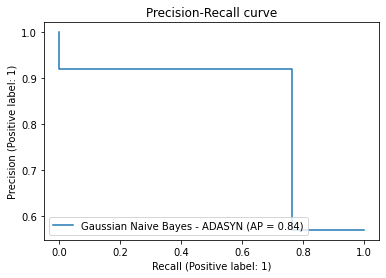

In [33]:
gnb_adasyn = GaussianNB()
gnb_adasyn.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)
gnb_adasyn_yPred = gnb_adasyn.predict(processed_test_data_trX)
#Performance Metrics obtained using Naive Bayes
gnb_list = ["Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning"]
gnb_list.extend(print_metrics(processed_test_data_trY, gnb_adasyn_yPred,"Gaussian Naive Bayes - ADASYN"))
gnb_results_table.append(gnb_list)

In [34]:
gnb_results_table

[['Gaussian Naive Bayes', 0.8068, 0.8121, 0.9096, 0.7335],
 ['Gaussian Naive Bayes - SMOTE', 0.8067, 0.8121, 0.9092, 0.7338],
 ['Gaussian Naive Bayes - ADASYN', 0.8275, 0.8343, 0.9204, 0.763],
 ['Gaussian Naive Bayes after Hyperparameter Tuning',
  0.8087,
  0.8121,
  0.921,
  0.7263],
 ['Gaussian Naive Bayes - SMOTE after Hyperparameter Tuning',
  0.8088,
  0.8123,
  0.9207,
  0.7267],
 ['Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning',
  0.8275,
  0.8343,
  0.9204,
  0.763]]

In [35]:
#Tabulating the obtained results and displaying the results by formatting
gnb_df = pd.DataFrame(gnb_results_table,columns = ["Classifier","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(gnb_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Classifier,accuracy,f1-score,Precision,Recall
0,Gaussian Naive Bayes,0.8068,0.8121,0.9096,0.7335
1,Gaussian Naive Bayes - SMOTE,0.8067,0.8121,0.9092,0.7338
2,Gaussian Naive Bayes - ADASYN,0.8275,0.8343,0.9204,0.7630
3,Gaussian Naive Bayes after Hyperparameter Tuning,0.8087,0.8121,0.9210,0.7263
4,Gaussian Naive Bayes - SMOTE after Hyperparameter Tuning,0.8088,0.8123,0.9207,0.7267
5,Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning,0.8275,0.8343,0.9204,0.7630


100%|██████████| 34/34 [00:56<00:00,  1.68s/it]


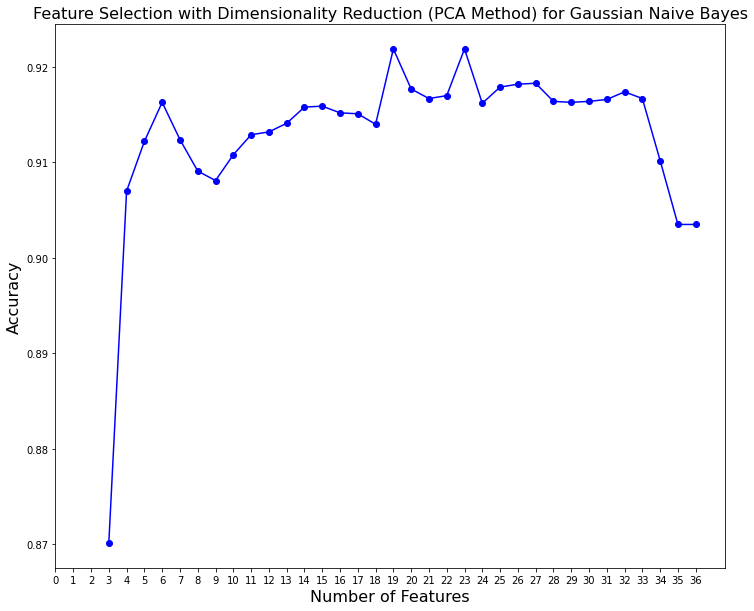

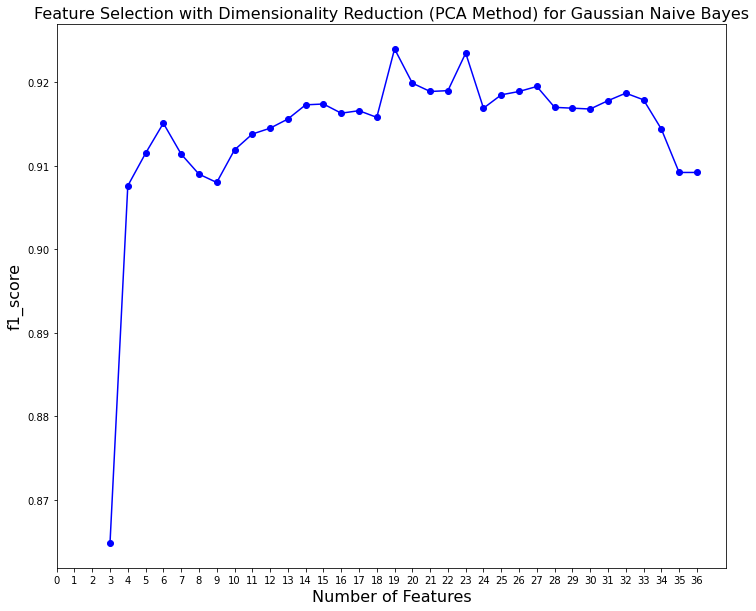

GNB Model - Maximum accuracy obtained using PCA is 0.9219 for the number of components = 19
GNB Model - Maximum f1-score obtained using PCA is 0.924 for the number of components = 19


In [36]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
gnb_adasyn = GaussianNB()
acc_dict = {}
f1_dict = {}
for nf in tqdm(range(3,processed_adasyn_train_data_trX.shape[1]+1)):
    acc_val = []
    f1_val = []
    for train_index,test_index in skf.split(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY):
        X_train, X_test = processed_adasyn_train_data_trX.iloc[train_index], processed_adasyn_train_data_trX.iloc[test_index]
        y_train, y_test = processed_adasyn_train_data_trY.iloc[train_index], processed_adasyn_train_data_trY.iloc[test_index]
        pca = PCA(n_components=nf,random_state=rs)
        pca_train = pca.fit_transform(X_train)
        gnb_adasyn.fit(pca_train,y_train)
        pca_test = pca.transform(X_test)
        pca_test_predict = gnb_adasyn.predict(pca_test)
        acc_val.append(round(accuracy_score(y_test, pca_test_predict),4))
        f1_val.append(round(f1_score(y_test,pca_test_predict,labels=np.unique(pca_test_predict)),4))
    acc_dict[nf] = round(sum(acc_val)/len(acc_val),4)
    f1_dict[nf] = round(sum(f1_val)/len(f1_val),4)
plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(acc_dict.items())),color='blue',marker='o')
Title = "Feature Selection with Dimensionality Reduction (PCA Method) for Gaussian Naive Bayes"
plt.title(Title, fontsize=16)
plt.xticks(range(0,processed_adasyn_train_data_trX.shape[1]+1))
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show();
plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(f1_dict.items())),color='blue',marker='o')
Title = "Feature Selection with Dimensionality Reduction (PCA Method) for Gaussian Naive Bayes"
plt.title(Title, fontsize=16)
plt.xticks(range(0,processed_adasyn_train_data_trX.shape[1]+1))
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("f1_score", fontsize=16)
plt.show();
acc_adasyn_gnb = max(acc_dict.values())
acc_nfea_adasyn_gnb=  max(acc_dict, key=acc_dict.get)
f1_adasyn_gnb = max(f1_dict.values())
f1_nfea_adasyn_gnb=  max(f1_dict, key=f1_dict.get)
print("GNB Model - Maximum accuracy obtained using PCA is {} for the number of components = {}".format(acc_adasyn_gnb,acc_nfea_adasyn_gnb))
print("GNB Model - Maximum f1-score obtained using PCA is {} for the number of components = {}".format(f1_adasyn_gnb,f1_nfea_adasyn_gnb))

In [37]:
def utility_select_feature(processed_adasyn_train_data_trX, processed_adasyn_train_data_trY, fsm, model):
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    acc_val = []
    f1_val = []
    for train_index,test_index in skf.split(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY):
        X_train, X_test = processed_adasyn_train_data_trX.iloc[train_index], processed_adasyn_train_data_trX.iloc[test_index]
        y_train, y_test = processed_adasyn_train_data_trY.iloc[train_index], processed_adasyn_train_data_trY.iloc[test_index]
        fs = fsm.fit(X_train, y_train)
        Xtrain_new = fs.transform(X_train)
        Xtest_new = fs.transform(X_test)
        model.fit(Xtrain_new, y_train)
        yPred = model.predict(Xtest_new)
        acc_val.append(round(accuracy_score(y_test, yPred),4))
        f1_val.append(round(f1_score(y_test,yPred,labels=np.unique(yPred)),4))
    acc = round(sum(acc_val)/len(acc_val),4)
    f1 = round(sum(f1_val)/len(f1_val),4)
    return acc,f1

100%|██████████| 33/33 [2:55:50<00:00, 319.70s/it]  


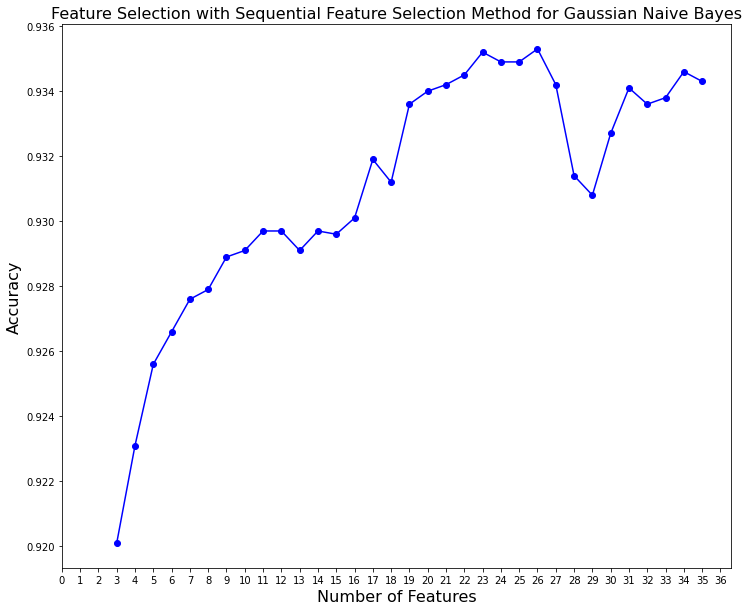

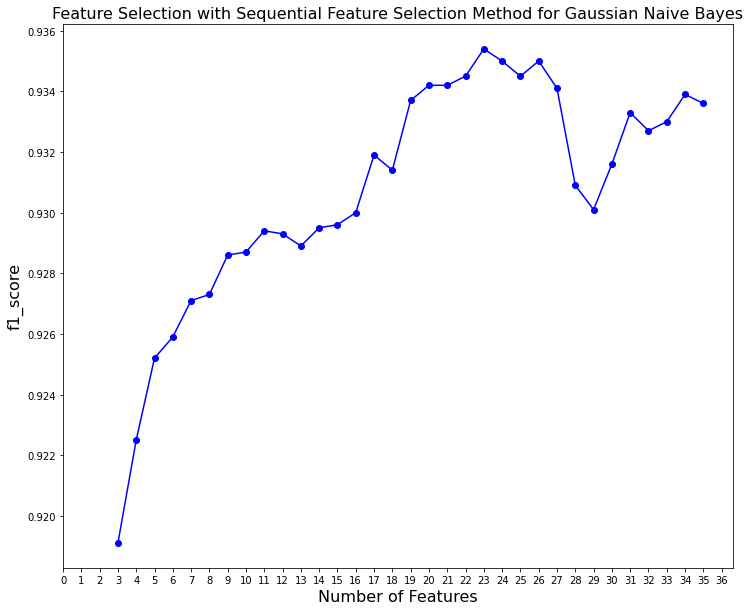

GNB Model - Maximum accuracy obtained using Sequential Feature Selection Method 0.9353 for the number of features = 26
GNB Model - Maximum f1-score obtained using Sequential Feature Selection Method 0.9354 for the number of features = 23


In [38]:
gnb_adasyn = GaussianNB()
acc_dict = {}
f1_dict ={}
for nf in tqdm(range(3,processed_adasyn_train_data_trX.shape[1])): #Upper range should be n-1 features
    sfs = SequentialFeatureSelector(gnb_adasyn, n_features_to_select=nf)
    acc,f1_val = utility_select_feature(processed_adasyn_train_data_trX, processed_adasyn_train_data_trY, sfs, gnb_adasyn)
    acc_dict[nf] = acc
    f1_dict[nf] = f1_val

plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(acc_dict.items())),color='blue',marker='o')
Title = "Feature Selection with Sequential Feature Selection Method for Gaussian Naive Bayes"
plt.title(Title, fontsize=16)
plt.xticks(range(0,processed_adasyn_train_data_trX.shape[1]+1))
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show();

plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(f1_dict.items())),color='blue',marker='o')
Title = "Feature Selection with Sequential Feature Selection Method for Gaussian Naive Bayes"
plt.title(Title, fontsize=16)
plt.xticks(range(0,processed_adasyn_train_data_trX.shape[1]+1))
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("f1_score", fontsize=16)
plt.show();

acc_adasyn_gnb = max(acc_dict.values())
acc_nfea_adasyn_gnb=  max(acc_dict, key=acc_dict.get)
f1_adasyn_gnb = max(f1_dict.values())
f1_nfea_adasyn_gnb=  max(f1_dict, key=f1_dict.get)
print("GNB Model - Maximum accuracy obtained using Sequential Feature Selection Method {} for the number of features = {}".format(acc_adasyn_gnb,acc_nfea_adasyn_gnb))
print("GNB Model - Maximum f1-score obtained using Sequential Feature Selection Method {} for the number of features = {}".format(f1_adasyn_gnb,f1_nfea_adasyn_gnb))

In [39]:
print(acc_dict[23],acc_dict[26])
print(f1_dict[23],f1_dict[26])

0.9352 0.9353
0.9354 0.935


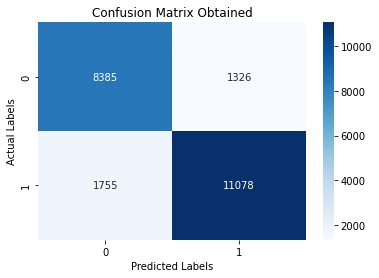

Accuarcy value obtained is  0.8633
F1-score obtained is  0.8779
Precision obtained is  0.8931
Recall obtained is  0.8632


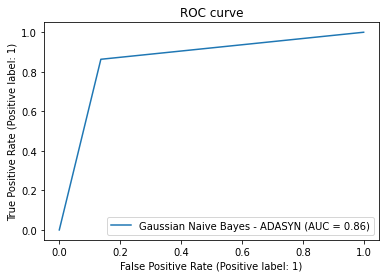

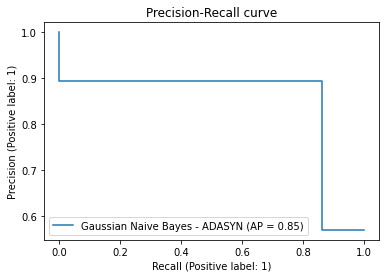

In [41]:
gnb = GaussianNB()
adasyn = ADASYN(random_state=rs)
pca = PCA(n_components=19,random_state=rs)
gnb_pca_pipeline = Pipeline([('adasyn', adasyn), ('pca', pca), ('gnb', gnb)])
gnb_pca_pipeline.fit(processed_train_data_trX,processed_train_data_trY)
gnb_pca_pipeline_yPred = gnb_pca_pipeline.predict(processed_test_data_trX)
gnb_list = ["Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA"]
gnb_list.extend(print_metrics(processed_test_data_trY, gnb_pca_pipeline_yPred,"Gaussian Naive Bayes - ADASYN"))
gnb_results_table.append(gnb_list)

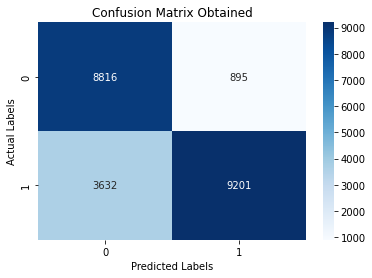

Accuarcy value obtained is  0.7992
F1-score obtained is  0.8026
Precision obtained is  0.9114
Recall obtained is  0.717


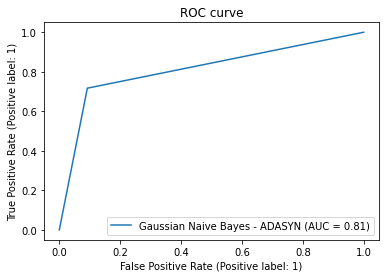

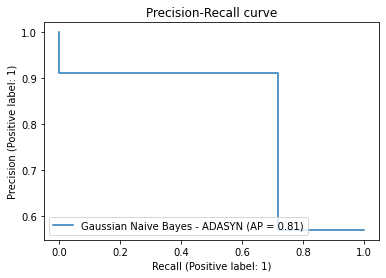

In [42]:
gnb = GaussianNB()
adasyn = ADASYN(random_state=rs)
sfs = SequentialFeatureSelector(gnb, n_features_to_select=23)
gnb_sfs_pipeline = Pipeline([('adasyn', adasyn), ('sfs', sfs), ('gnb', gnb)])
gnb_sfs_pipeline.fit(processed_train_data_trX,processed_train_data_trY)
gnb_sfs_pipeline_yPred = gnb_sfs_pipeline.predict(processed_test_data_trX)
gnb_list = ["Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning and Feature Selection based on Sequential Feature Selection"]
gnb_list.extend(print_metrics(processed_test_data_trY, gnb_sfs_pipeline_yPred,"Gaussian Naive Bayes - ADASYN"))
gnb_results_table.append(gnb_list)

In [43]:
#Tabulating the obtained results and displaying the results by formatting
gnb_df = pd.DataFrame(gnb_results_table, columns = ["Classifier","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(gnb_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Classifier,accuracy,f1-score,Precision,Recall
0,Gaussian Naive Bayes,0.8068,0.8121,0.9096,0.7335
1,Gaussian Naive Bayes - SMOTE,0.8067,0.8121,0.9092,0.7338
2,Gaussian Naive Bayes - ADASYN,0.8275,0.8343,0.9204,0.7630
3,Gaussian Naive Bayes after Hyperparameter Tuning,0.8087,0.8121,0.9210,0.7263
4,Gaussian Naive Bayes - SMOTE after Hyperparameter Tuning,0.8088,0.8123,0.9207,0.7267
5,Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning,0.8275,0.8343,0.9204,0.7630
6,Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA,0.8633,0.8779,0.8931,0.8632
7,Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning and Feature Selection based on Sequential Feature Selection,0.7992,0.8026,0.9114,0.7170


In [44]:
gnb_df = gnb_df.set_index("Classifier")

In [45]:
with pd.option_context('display.precision', 4):
    formatted_table=(gnb_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,accuracy,f1-score,Precision,Recall
Classifier,,,,
Gaussian Naive Bayes,0.8068,0.8121,0.9096,0.7335
Gaussian Naive Bayes - SMOTE,0.8067,0.8121,0.9092,0.7338
Gaussian Naive Bayes - ADASYN,0.8275,0.8343,0.9204,0.7630
Gaussian Naive Bayes after Hyperparameter Tuning,0.8087,0.8121,0.9210,0.7263
Gaussian Naive Bayes - SMOTE after Hyperparameter Tuning,0.8088,0.8123,0.9207,0.7267
Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning,0.8275,0.8343,0.9204,0.7630
Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA,0.8633,0.8779,0.8931,0.8632
Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning and Feature Selection based on Sequential Feature Selection,0.7992,0.8026,0.9114,0.7170
